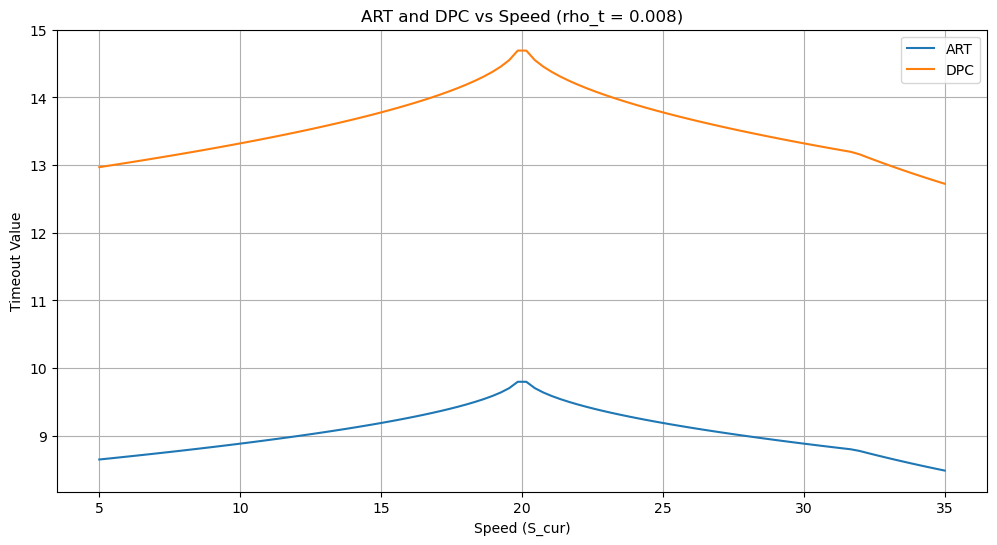

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 고정 파라미터
art_base = 100.0
dpc_base = 150.0

W_base_rho = 0.027
W_base_S = 0.037
S_change = -0.003
F_change = -0.03
F_rho = 10
W_rho_min = 0.01
W_min = 0.01
W_rho_max = 0.10
W_max = 0.1
inter_scale = 0.01

S_avg = 20.0
rho_t_avg = 0.005
deltaS = 0.3
rho_t_fixed = 0.008  # 밀도 고정

S_cur_values = np.linspace(5, 35, 100)
art_list = []
dpc_list = []

for S_cur in S_cur_values:
    W_S = max(W_min, min(W_base_S +
        max(-0.03, min(np.sqrt(abs(S_cur - S_avg)) * S_change, 0.03)) +
        max(-0.02, min(deltaS * F_change, 0.02)), W_max))

    W_rho_t = max(W_rho_min, min(W_base_rho +
        max(-0.03, min((rho_t_fixed - rho_t_avg) * F_rho, 0.03)), W_rho_max))

    F_rho_t = max(0.8, min(1.2, rho_t_fixed / 0.002))
    F_S = max(0.9, min(1.1, 35.0 / S_cur))
    F_inter = 1.0 + abs(W_rho_t - W_S) * inter_scale

    F_adjust = ((W_S * F_S) + (W_rho_t * F_rho_t)) * F_inter

    art = max(2.0, min(100.0, art_base * F_adjust))
    dpc = max(5.0, min(500.0, dpc_base * F_adjust))

    art_list.append(art)
    dpc_list.append(dpc)

plt.figure(figsize=(12, 6))
plt.plot(S_cur_values, art_list, label="ART")
plt.plot(S_cur_values, dpc_list, label="DPC")
plt.xlabel("Speed (S_cur)")
plt.ylabel("Timeout Value")
plt.title(f"ART and DPC vs Speed (rho_t = {rho_t_fixed})")
plt.legend()
plt.grid(True)
plt.show()


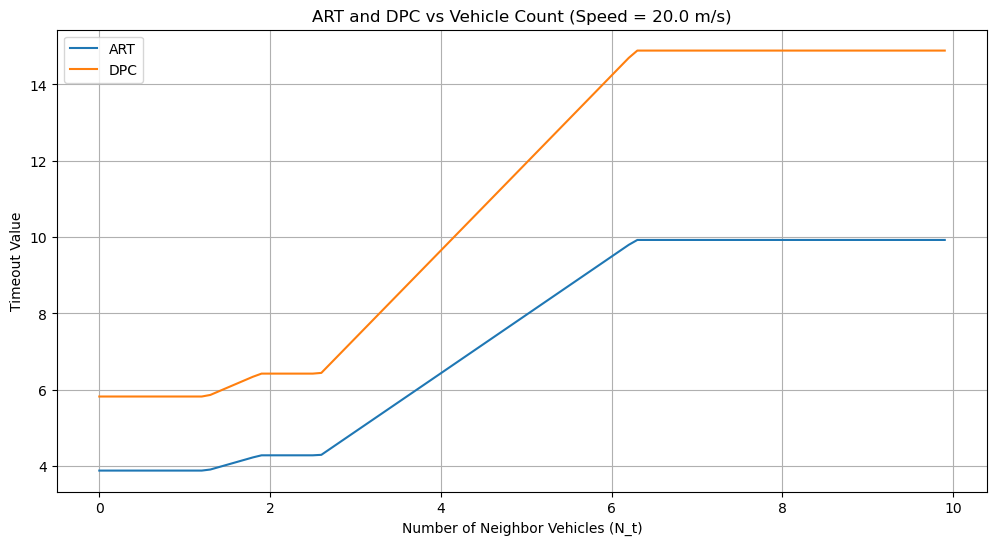

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 고정 파라미터
art_base = 100.0
dpc_base = 150.0

W_base_rho = 0.027
W_base_S = 0.037
S_change = -0.003
F_change = -0.03
F_rho = 10
W_rho_min = 0.01
W_min = 0.01
W_rho_max = 0.10
W_max = 0.1
inter_scale = 0.01

S_avg = 20.0
rho_t_avg = 0.005  # 그대로 유지
deltaS = 0.3
S_cur_fixed = 20.0  # 속력 고정
radius = 50.0  # 통신 반경 (meter)

# 차량 수 (0~80대)
N_t_values = np.arange(0, 10, 0.1)

# 결과 저장
art_list = []
dpc_list = []

for N_t in N_t_values:
    rho_t = (N_t / (np.pi * radius ** 2)) * 10  # 차량 수 기반 밀도 계산

    W_S = max(W_min, min(W_base_S +
        max(-0.03, min(np.sqrt(abs(S_cur_fixed - S_avg)) * S_change, 0.03)) +
        max(-0.02, min(deltaS * F_change, 0.02)), W_max))

    W_rho_t = max(W_rho_min, min(W_base_rho +
        max(-0.03, min((rho_t - rho_t_avg) * F_rho, 0.03)), W_rho_max))

    F_rho_t = max(0.8, min(1.2, rho_t / 0.002))
    F_S = max(0.9, min(1.1, 35.0 / S_cur_fixed))
    F_inter = 1.0 + abs(W_rho_t - W_S) * inter_scale

    F_adjust = ((W_S * F_S) + (W_rho_t * F_rho_t)) * F_inter

    art = max(2.0, min(100.0, art_base * F_adjust))
    dpc = max(5.0, min(500.0, dpc_base * F_adjust))

    art_list.append(art)
    dpc_list.append(dpc)

plt.figure(figsize=(12, 6))
plt.plot(N_t_values, art_list, label="ART")
plt.plot(N_t_values, dpc_list, label="DPC")
plt.xlabel("Number of Neighbor Vehicles (N_t)")
plt.ylabel("Timeout Value")
plt.title(f"ART and DPC vs Vehicle Count (Speed = {S_cur_fixed} m/s)")
plt.legend()
plt.grid(True)
plt.show()


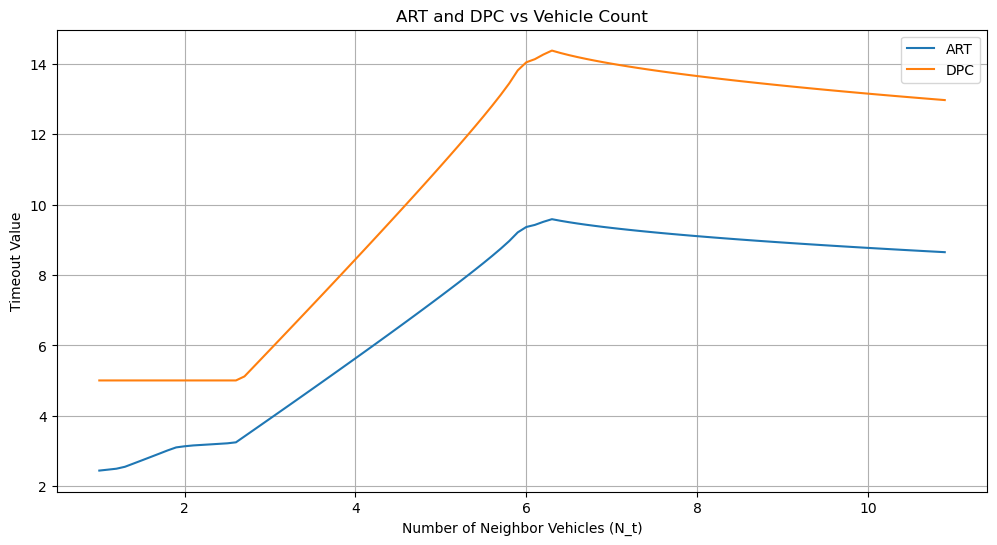

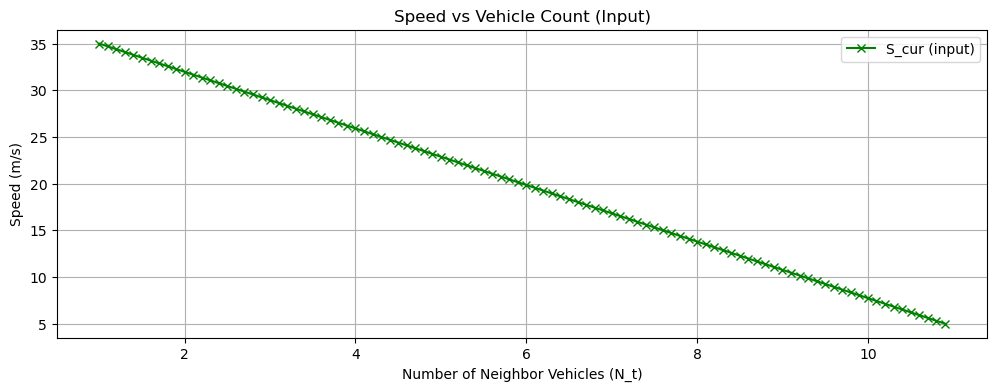

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 고정 파라미터
art_base = 100.0
dpc_base = 150.0

W_base_rho = 0.027
W_base_S = 0.037
S_change = -0.003
F_change = -0.03
F_rho = 10
W_rho_min = 0.01
W_min = 0.01
W_rho_max = 0.10
W_max = 0.1
inter_scale = 0.01

S_avg = 20.0
rho_t_avg = 0.005
deltaS = 0.3
radius = 50.0

# 입력: N_t와 S_cur 쌍으로 주기
N_t_values = np.arange(1, 11, 0.1)
S_cur_values = np.linspace(35.0, 5.0, len(N_t_values))  # 예시: 차량 수 증가 시 속도 감소

# 결과 저장
art_list = []
dpc_list = []

for N_t, S_cur in zip(N_t_values, S_cur_values):
    rho_t = (N_t / (np.pi * radius ** 2)) * 10

    W_S = max(W_min, min(W_base_S +
        max(-0.03, min(np.sqrt(abs(S_cur - S_avg)) * S_change, 0.03)) +
        max(-0.02, min(deltaS * F_change, 0.02)), W_max))

    W_rho_t = max(W_rho_min, min(W_base_rho +
        max(-0.03, min((rho_t - rho_t_avg) * F_rho, 0.03)), W_rho_max))

    F_rho_t = max(0.8, min(1.2, rho_t / 0.002))
    F_S = max(0.9, min(1.1, 35.0 / S_cur))
    F_inter = 1.0 + abs(W_rho_t - W_S) * inter_scale

    F_adjust = ((W_S * F_S) + (W_rho_t * F_rho_t)) * F_inter

    art = max(2.0, min(100.0, art_base * F_adjust))
    dpc = max(5.0, min(500.0, dpc_base * F_adjust))

    art_list.append(art)
    dpc_list.append(dpc)

# ART/DPC vs N_t 그래프
plt.figure(figsize=(12, 6))
plt.plot(N_t_values, art_list, label="ART")

plt.plot(N_t_values, dpc_list, label="DPC")
plt.xlabel("Number of Neighbor Vehicles (N_t)")
plt.ylabel("Timeout Value")
plt.title("ART and DPC vs Vehicle Count")
plt.legend()
plt.grid(True)
plt.show()

# 속력 vs N_t 확인 그래프
plt.figure(figsize=(12, 4))
plt.plot(N_t_values, S_cur_values, label="S_cur (input)", color='green', marker='x')
plt.xlabel("Number of Neighbor Vehicles (N_t)")
plt.ylabel("Speed (m/s)")
plt.title("Speed vs Vehicle Count (Input)")
plt.grid(True)
plt.legend()
plt.show()


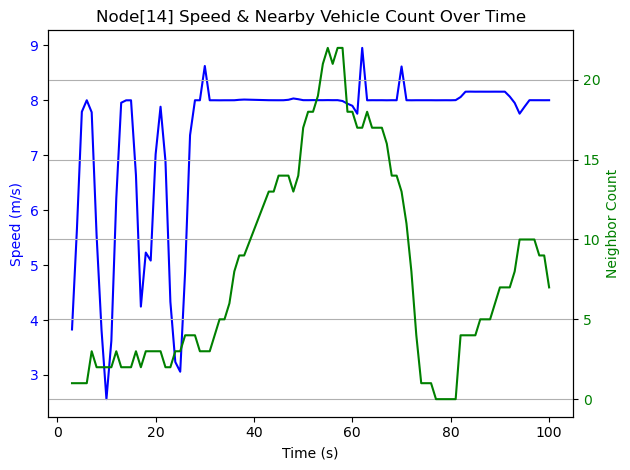

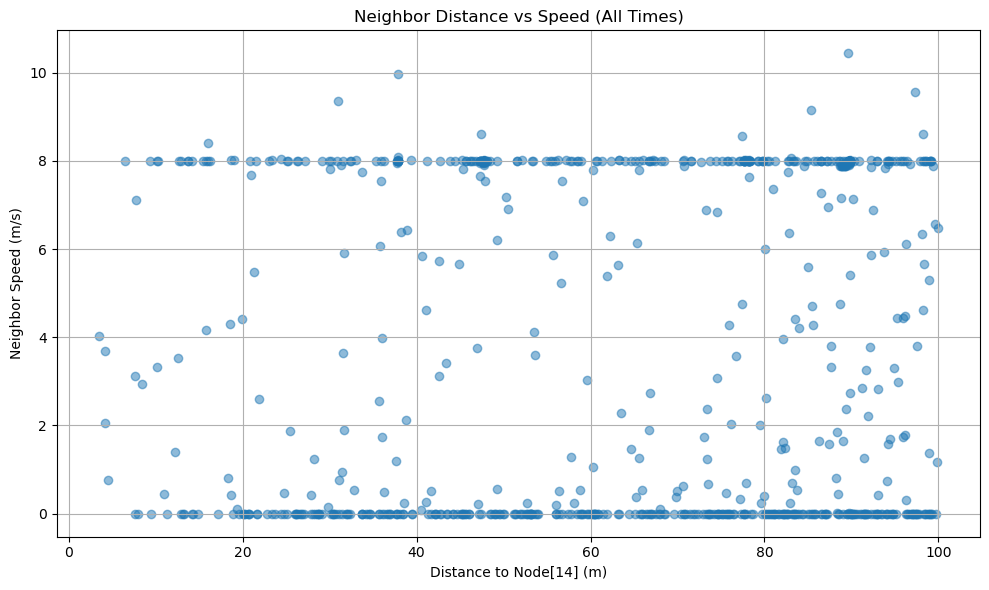

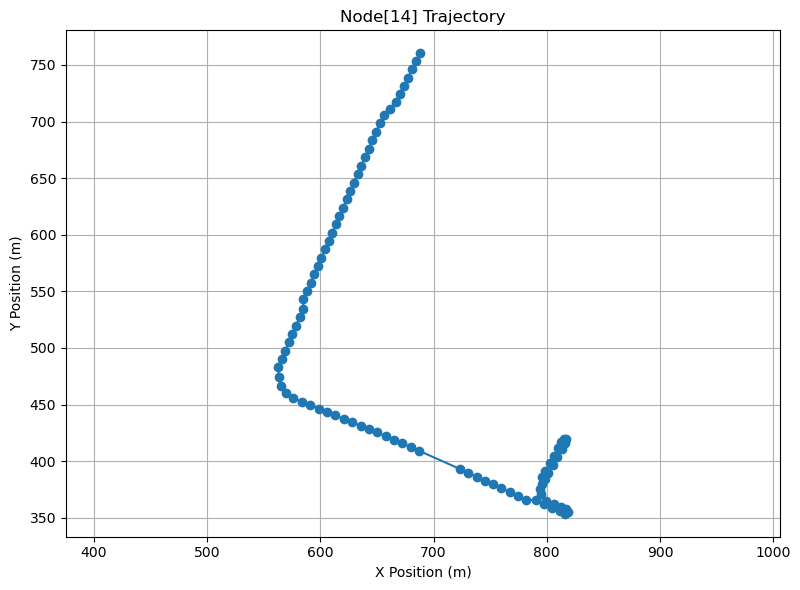

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from collections import defaultdict

# === 설정 ===
TARGET_NODE = 'node[14]'
DIST_THRESHOLD = 100  # 주변 차량 반경(m)
POSITION_LOG_PATH = 'position_all-a.csv'

# === CSV 로드 ===
df = pd.read_csv(POSITION_LOG_PATH)
df = df.sort_values(by=['Time', 'Node']).reset_index(drop=True)

# === 거리 계산 함수 ===
def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# === 시간 기반 위치 정리 ===
times = sorted(df['Time'].unique())
node_positions = defaultdict(dict)  # {time: {node: (x, y)}}

for t in times:
    sub_df = df[df['Time'] == t]
    for _, row in sub_df.iterrows():
        node_positions[t][row['Node']] = (row['NodeX'], row['NodeY'])

# === 속도 계산 ===
def compute_speed(pos1, pos2, dt):
    if pos1 is None or pos2 is None:
        return None
    return euclidean(pos1, pos2) / dt

# === 결과 저장용 리스트 ===
result = []

for i in range(1, len(times)):
    t_prev, t_now = times[i-1], times[i]
    dt = t_now - t_prev

    pos_prev = node_positions[t_prev].get(TARGET_NODE)
    pos_now = node_positions[t_now].get(TARGET_NODE)
    if pos_now is None or pos_prev is None:
        continue

    speed_self = compute_speed(pos_prev, pos_now, dt)

    neighbors = []
    for node, pos in node_positions[t_now].items():
        if node == TARGET_NODE:
            continue
        dist = euclidean(pos_now, pos)
        if dist <= DIST_THRESHOLD:
            pos_prev_neighbor = node_positions[t_prev].get(node)
            speed_neighbor = compute_speed(pos_prev_neighbor, pos, dt)
            neighbors.append((node, dist, speed_neighbor))

    result.append({
        'Time': t_now,
        'Self_X': pos_now[0],
        'Self_Y': pos_now[1],
        'Self_Speed': speed_self,
        'Num_Neighbors': len(neighbors),
        'Neighbors': neighbors
    })

# === 시각화 1: Node[14] 속도 및 주변 차량 수 변화 ===
times_plot = [r['Time'] for r in result]
speed_plot = [r['Self_Speed'] for r in result]
neighbor_count_plot = [r['Num_Neighbors'] for r in result]

fig, ax1 = plt.subplots()
ax1.plot(times_plot, speed_plot, 'b-', label='Node[14] Speed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(times_plot, neighbor_count_plot, 'g-', label='Neighbor Count')
ax2.set_ylabel('Neighbor Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Node[14] Speed & Nearby Vehicle Count Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 2: 주변 차량 거리 및 속도 산점도 (시간 누적) ===
neighbor_data = []

for r in result:
    for n in r['Neighbors']:
        neighbor_data.append({
            'Time': r['Time'],
            'Neighbor': n[0],
            'Distance': n[1],
            'Speed': n[2]
        })

neighbor_df = pd.DataFrame(neighbor_data)

plt.figure(figsize=(10, 6))
plt.scatter(neighbor_df['Distance'], neighbor_df['Speed'], alpha=0.5)
plt.xlabel('Distance to Node[14] (m)')
plt.ylabel('Neighbor Speed (m/s)')
plt.title('Neighbor Distance vs Speed (All Times)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 3: Node[14]의 이동 궤적 ===
x_track = [r['Self_X'] for r in result]
y_track = [r['Self_Y'] for r in result]

plt.figure(figsize=(8, 6))
plt.plot(x_track, y_track, marker='o')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Node[14] Trajectory')
plt.grid(True)
plt.tight_layout()
plt.axis('equal')
plt.show()


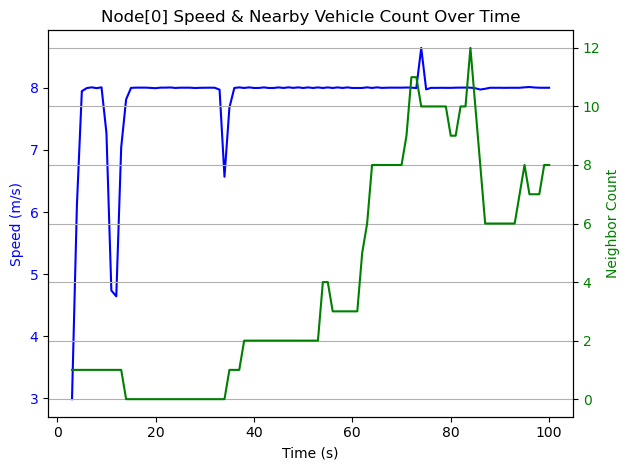

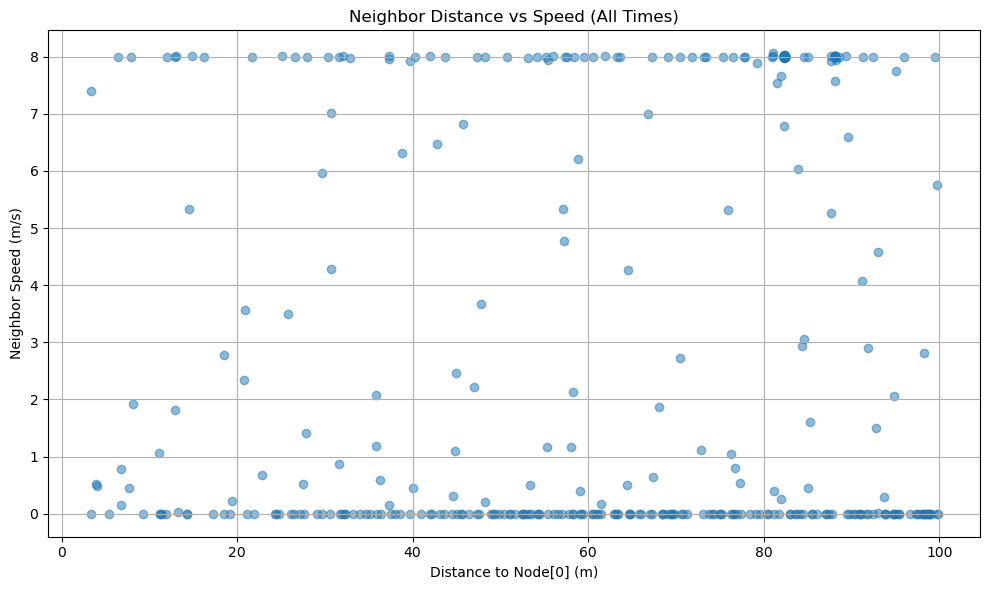

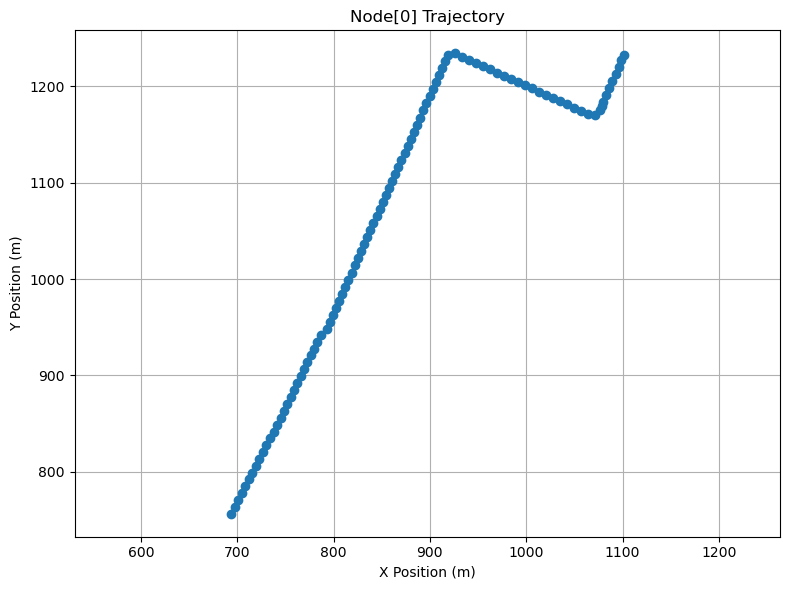

In [24]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from collections import defaultdict

# === 설정 ===
TARGET_NODE = 'node[0]'
DIST_THRESHOLD = 100  # 주변 차량 반경(m)
POSITION_LOG_PATH = 'position_all.csv'

# === CSV 로드 ===
df = pd.read_csv(POSITION_LOG_PATH)
df = df.sort_values(by=['Time', 'Node']).reset_index(drop=True)

# === 거리 계산 함수 ===
def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# === 시간 기반 위치 정리 ===
times = sorted(df['Time'].unique())
node_positions = defaultdict(dict)  # {time: {node: (x, y)}}

for t in times:
    sub_df = df[df['Time'] == t]
    for _, row in sub_df.iterrows():
        node_positions[t][row['Node']] = (row['NodeX'], row['NodeY'])

# === 속도 계산 ===
def compute_speed(pos1, pos2, dt):
    if pos1 is None or pos2 is None:
        return None
    return euclidean(pos1, pos2) / dt

# === 결과 저장용 리스트 ===
result = []

for i in range(1, len(times)):
    t_prev, t_now = times[i-1], times[i]
    dt = t_now - t_prev

    pos_prev = node_positions[t_prev].get(TARGET_NODE)
    pos_now = node_positions[t_now].get(TARGET_NODE)
    if pos_now is None or pos_prev is None:
        continue

    speed_self = compute_speed(pos_prev, pos_now, dt)

    neighbors = []
    for node, pos in node_positions[t_now].items():
        if node == TARGET_NODE:
            continue
        dist = euclidean(pos_now, pos)
        if dist <= DIST_THRESHOLD:
            pos_prev_neighbor = node_positions[t_prev].get(node)
            speed_neighbor = compute_speed(pos_prev_neighbor, pos, dt)
            neighbors.append((node, dist, speed_neighbor))

    result.append({
        'Time': t_now,
        'Self_X': pos_now[0],
        'Self_Y': pos_now[1],
        'Self_Speed': speed_self,
        'Num_Neighbors': len(neighbors),
        'Neighbors': neighbors
    })

# === 시각화 1: Node[14] 속도 및 주변 차량 수 변화 ===
times_plot = [r['Time'] for r in result]
speed_plot = [r['Self_Speed'] for r in result]
neighbor_count_plot = [r['Num_Neighbors'] for r in result]

fig, ax1 = plt.subplots()
ax1.plot(times_plot, speed_plot, 'b-', label='Node[0] Speed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(times_plot, neighbor_count_plot, 'g-', label='Neighbor Count')
ax2.set_ylabel('Neighbor Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Node[0] Speed & Nearby Vehicle Count Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 2: 주변 차량 거리 및 속도 산점도 (시간 누적) ===
neighbor_data = []

for r in result:
    for n in r['Neighbors']:
        neighbor_data.append({
            'Time': r['Time'],
            'Neighbor': n[0],
            'Distance': n[1],
            'Speed': n[2]
        })

neighbor_df = pd.DataFrame(neighbor_data)

plt.figure(figsize=(10, 6))
plt.scatter(neighbor_df['Distance'], neighbor_df['Speed'], alpha=0.5)
plt.xlabel('Distance to Node[0] (m)')
plt.ylabel('Neighbor Speed (m/s)')
plt.title('Neighbor Distance vs Speed (All Times)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 3: Node[14]의 이동 궤적 ===
x_track = [r['Self_X'] for r in result]
y_track = [r['Self_Y'] for r in result]

plt.figure(figsize=(8, 6))
plt.plot(x_track, y_track, marker='o')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Node[0] Trajectory')
plt.grid(True)
plt.tight_layout()
plt.axis('equal')
plt.show()


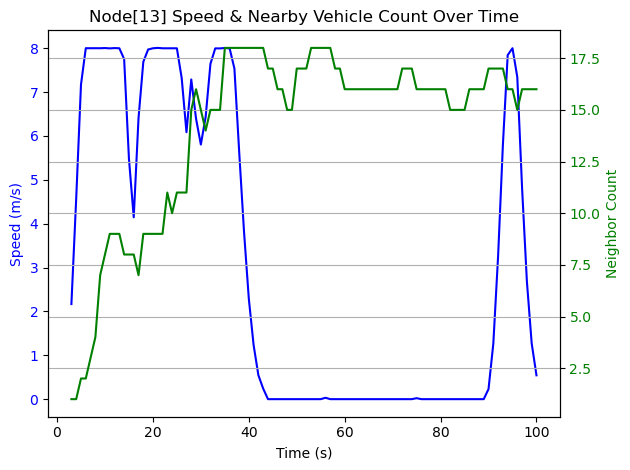

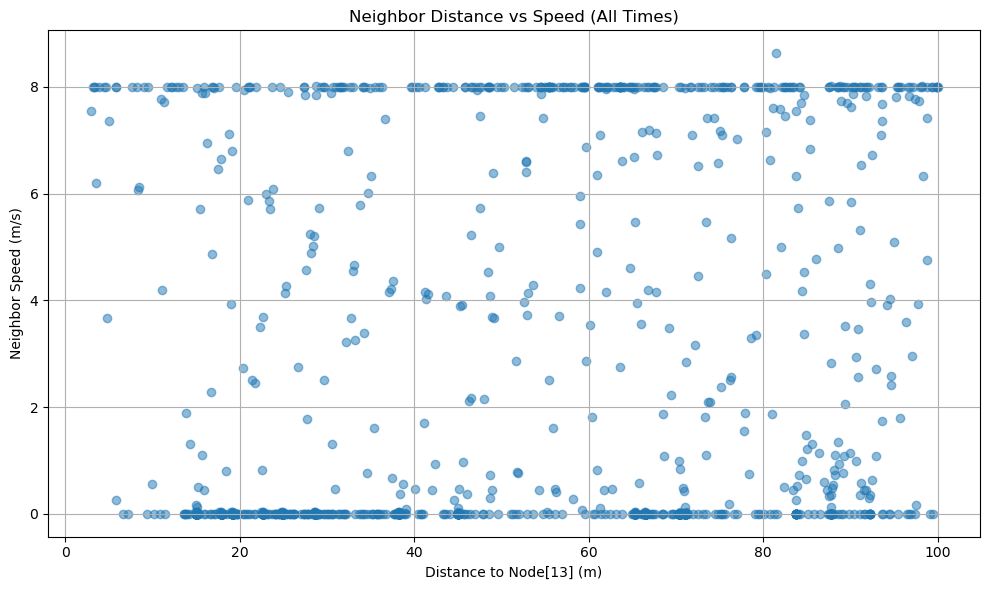

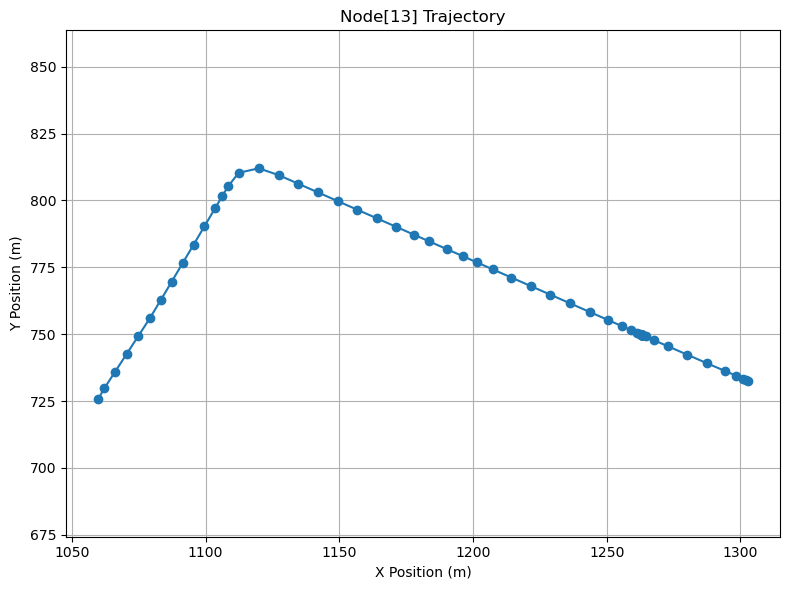

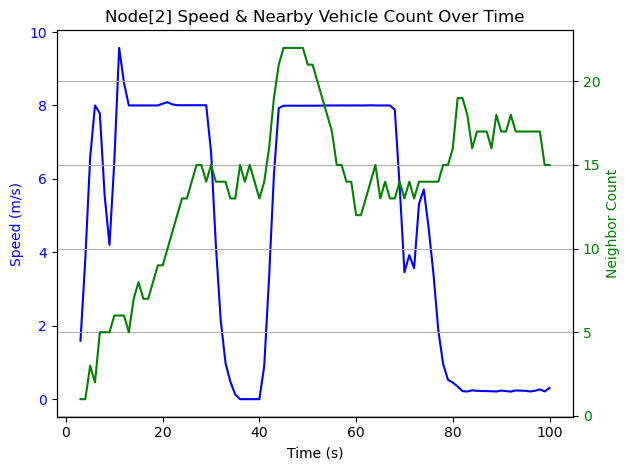

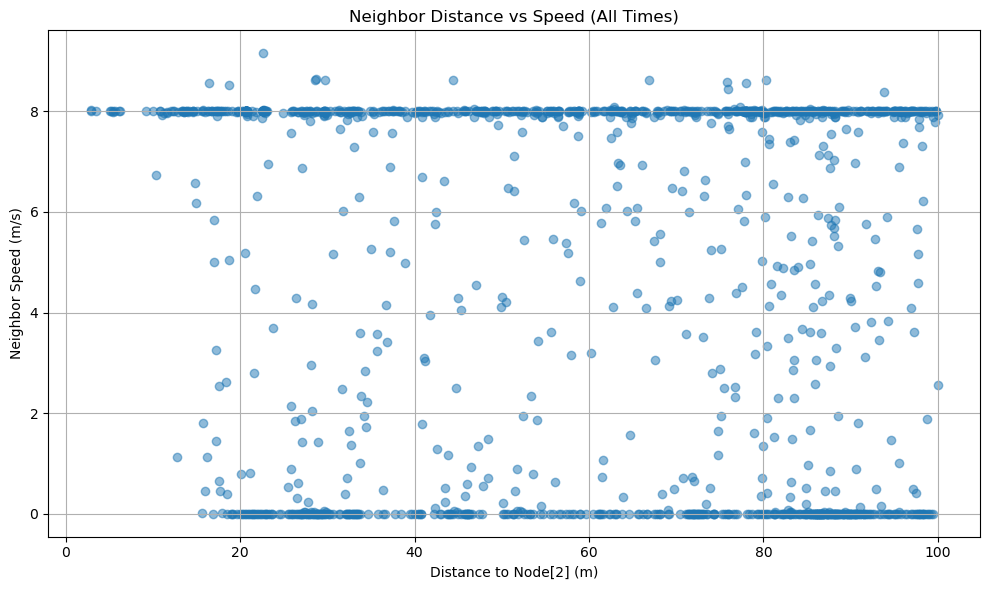

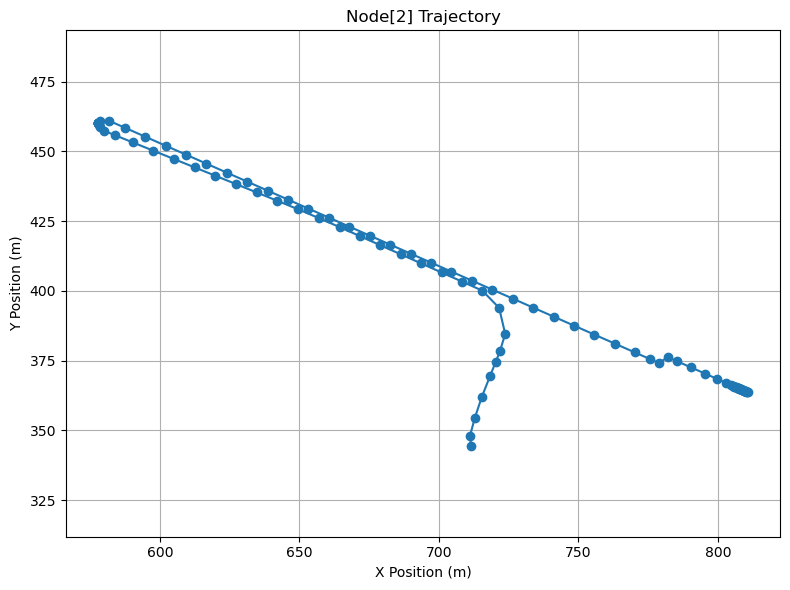

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from collections import defaultdict

# === 설정 ===
TARGET_NODE = 'node[14]'
DIST_THRESHOLD = 100  # 주변 차량 반경(m)
POSITION_LOG_PATH = 'position_all-d.csv'

# === CSV 로드 ===
df = pd.read_csv(POSITION_LOG_PATH)
df = df.sort_values(by=['Time', 'Node']).reset_index(drop=True)

# === 거리 계산 함수 ===
def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# === 시간 기반 위치 정리 ===
times = sorted(df['Time'].unique())
node_positions = defaultdict(dict)  # {time: {node: (x, y)}}

for t in times:
    sub_df = df[df['Time'] == t]
    for _, row in sub_df.iterrows():
        node_positions[t][row['Node']] = (row['NodeX'], row['NodeY'])

# === 속도 계산 ===
def compute_speed(pos1, pos2, dt):
    if pos1 is None or pos2 is None:
        return None
    return euclidean(pos1, pos2) / dt

# === 결과 저장용 리스트 ===
result = []

for i in range(1, len(times)):
    t_prev, t_now = times[i-1], times[i]
    dt = t_now - t_prev

    pos_prev = node_positions[t_prev].get(TARGET_NODE)
    pos_now = node_positions[t_now].get(TARGET_NODE)
    if pos_now is None or pos_prev is None:
        continue

    speed_self = compute_speed(pos_prev, pos_now, dt)

    neighbors = []
    for node, pos in node_positions[t_now].items():
        if node == TARGET_NODE:
            continue
        dist = euclidean(pos_now, pos)
        if dist <= DIST_THRESHOLD:
            pos_prev_neighbor = node_positions[t_prev].get(node)
            speed_neighbor = compute_speed(pos_prev_neighbor, pos, dt)
            neighbors.append((node, dist, speed_neighbor))

    result.append({
        'Time': t_now,
        'Self_X': pos_now[0],
        'Self_Y': pos_now[1],
        'Self_Speed': speed_self,
        'Num_Neighbors': len(neighbors),
        'Neighbors': neighbors
    })

# === 시각화 1: Node[14] 속도 및 주변 차량 수 변화 ===
times_plot = [r['Time'] for r in result]
speed_plot = [r['Self_Speed'] for r in result]
neighbor_count_plot = [r['Num_Neighbors'] for r in result]

fig, ax1 = plt.subplots()
ax1.plot(times_plot, speed_plot, 'b-', label='Node[2] Speed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(times_plot, neighbor_count_plot, 'g-', label='Neighbor Count')
ax2.set_ylabel('Neighbor Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Node[2] Speed & Nearby Vehicle Count Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 2: 주변 차량 거리 및 속도 산점도 (시간 누적) ===
neighbor_data = []

for r in result:
    for n in r['Neighbors']:
        neighbor_data.append({
            'Time': r['Time'],
            'Neighbor': n[0],
            'Distance': n[1],
            'Speed': n[2]
        })

neighbor_df = pd.DataFrame(neighbor_data)

plt.figure(figsize=(10, 6))
plt.scatter(neighbor_df['Distance'], neighbor_df['Speed'], alpha=0.5)
plt.xlabel('Distance to Node[2] (m)')
plt.ylabel('Neighbor Speed (m/s)')
plt.title('Neighbor Distance vs Speed (All Times)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 3: Node[14]의 이동 궤적 ===
x_track = [r['Self_X'] for r in result]
y_track = [r['Self_Y'] for r in result]

plt.figure(figsize=(8, 6))
plt.plot(x_track, y_track, marker='o')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Node[2] Trajectory')
plt.grid(True)
plt.tight_layout()
plt.axis('equal')
plt.show()


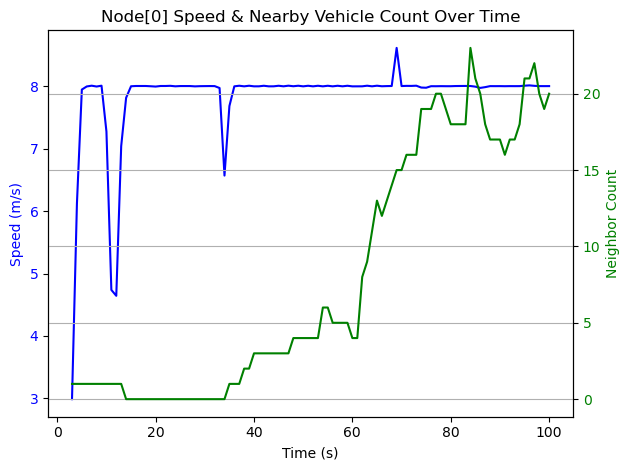

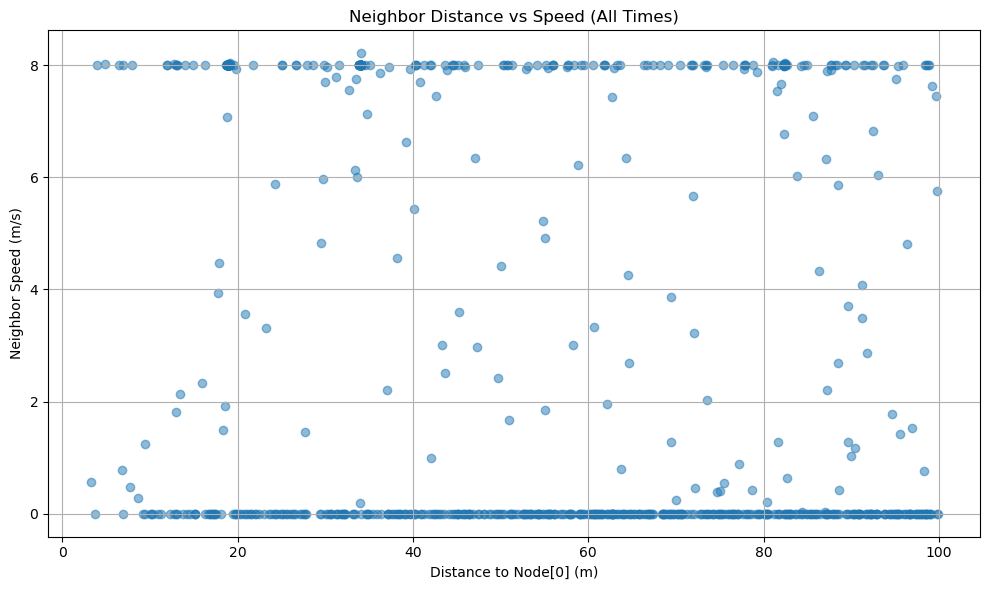

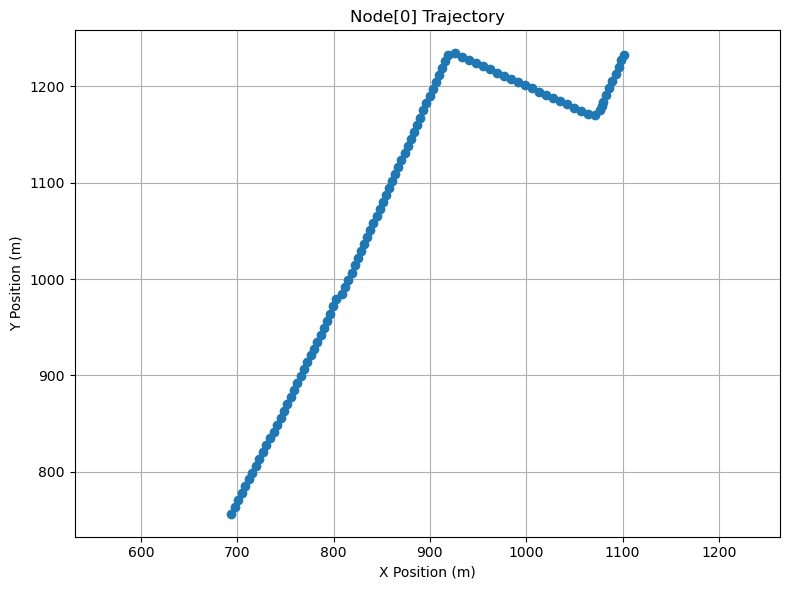

In [31]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from collections import defaultdict

# === 설정 ===
TARGET_NODE = 'node[0]'
DIST_THRESHOLD = 100  # 주변 차량 반경(m)
POSITION_LOG_PATH = 'position_all-d.csv'

# === CSV 로드 ===
df = pd.read_csv(POSITION_LOG_PATH)
df = df.sort_values(by=['Time', 'Node']).reset_index(drop=True)

# === 거리 계산 함수 ===
def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# === 시간 기반 위치 정리 ===
times = sorted(df['Time'].unique())
node_positions = defaultdict(dict)  # {time: {node: (x, y)}}

for t in times:
    sub_df = df[df['Time'] == t]
    for _, row in sub_df.iterrows():
        node_positions[t][row['Node']] = (row['NodeX'], row['NodeY'])

# === 속도 계산 ===
def compute_speed(pos1, pos2, dt):
    if pos1 is None or pos2 is None:
        return None
    return euclidean(pos1, pos2) / dt

# === 결과 저장용 리스트 ===
result = []

for i in range(1, len(times)):
    t_prev, t_now = times[i-1], times[i]
    dt = t_now - t_prev

    pos_prev = node_positions[t_prev].get(TARGET_NODE)
    pos_now = node_positions[t_now].get(TARGET_NODE)
    if pos_now is None or pos_prev is None:
        continue

    speed_self = compute_speed(pos_prev, pos_now, dt)

    neighbors = []
    for node, pos in node_positions[t_now].items():
        if node == TARGET_NODE:
            continue
        dist = euclidean(pos_now, pos)
        if dist <= DIST_THRESHOLD:
            pos_prev_neighbor = node_positions[t_prev].get(node)
            speed_neighbor = compute_speed(pos_prev_neighbor, pos, dt)
            neighbors.append((node, dist, speed_neighbor))

    result.append({
        'Time': t_now,
        'Self_X': pos_now[0],
        'Self_Y': pos_now[1],
        'Self_Speed': speed_self,
        'Num_Neighbors': len(neighbors),
        'Neighbors': neighbors
    })

# === 시각화 1: Node[14] 속도 및 주변 차량 수 변화 ===
times_plot = [r['Time'] for r in result]
speed_plot = [r['Self_Speed'] for r in result]
neighbor_count_plot = [r['Num_Neighbors'] for r in result]

fig, ax1 = plt.subplots()
ax1.plot(times_plot, speed_plot, 'b-', label='Node[0] Speed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(times_plot, neighbor_count_plot, 'g-', label='Neighbor Count')
ax2.set_ylabel('Neighbor Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Node[0] Speed & Nearby Vehicle Count Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 2: 주변 차량 거리 및 속도 산점도 (시간 누적) ===
neighbor_data = []

for r in result:
    for n in r['Neighbors']:
        neighbor_data.append({
            'Time': r['Time'],
            'Neighbor': n[0],
            'Distance': n[1],
            'Speed': n[2]
        })

neighbor_df = pd.DataFrame(neighbor_data)

plt.figure(figsize=(10, 6))
plt.scatter(neighbor_df['Distance'], neighbor_df['Speed'], alpha=0.5)
plt.xlabel('Distance to Node[0] (m)')
plt.ylabel('Neighbor Speed (m/s)')
plt.title('Neighbor Distance vs Speed (All Times)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 시각화 3: Node[14]의 이동 궤적 ===
x_track = [r['Self_X'] for r in result]
y_track = [r['Self_Y'] for r in result]

plt.figure(figsize=(8, 6))
plt.plot(x_track, y_track, marker='o')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Node[0] Trajectory')
plt.grid(True)
plt.tight_layout()
plt.axis('equal')
plt.show()
